In [12]:
import numpy as np
import matplotlib.pyplot as plt
from Data_Savior_J import load_file

Xc = load_file("preprocessed_data/1Amar.data")

\section{Features vector for classification:}

$X_c = [RF~| ~BF~| ~VM~| ~ES~| ~FE~| ~GP~| ~MP]$

$X_c = [~~0~~|~~1~~|~~~2~~~|~~3~~|~~4~~~|~~~5~~~|~~6~~]$

#### $RF \rightarrow$ rectus femoris; $BF \rightarrow$ biceps femoris; $VM \rightarrow$ vastus internus;$VM \rightarrow$ semitendinosus; $VM \rightarrow$ knee flexion


$GP$ \textbf{$\rightarrow$ gait pattern}

\begin{itemize}
\item $GP = 0 \rightarrow$ normal gait
\item $GP = 1 \rightarrow$ pathologic gait;
\end{itemize}

$MP$ \textbf{$\rightarrow$ movement pattern}

\begin{itemize}
\item $MP = 0 \rightarrow$ march 
\item $MP = 1 \rightarrow$ extention of the leg from sit position; 
\item $MP = 2 \rightarrow$ flexion of the knee stand up
\end{itemize}

In [2]:
import numpy as np
from Data_Savior_J import load_file

Xc = load_file("preprocessed_data/1Amar.data")


DATAFILE = ['1Apie.data', '1Asen.data', '2Amar.data', '2Apie.data', '2Asen.data', '3Amar.data', '3Apie.data', 
            '3Asen.data', '4Amar.data', '4Apie.data', '4Asen.data', '5Amar.data', '5Apie.data', '5Asen.data', 
            '6Amar.data', '6Apie.data', '6Asen.data', '7Amar.data', '7Apie.data', '7Asen.data', '8Amar.data', 
            '8Apie.data', '8Asen.data', '9Amar.data', '9Apie.data', '9Asen.data', '10Amar.data', '10Apie.data', 
            '10Asen.data', '11Amar.data', '11Apie.data', '11Asen.data', '1Nmar.data', '1Npie.data', '1Nsen.data', 
            '2Nmar.data', '2Npie.data', '2Nsen.data', '3Nmar.data', '3Npie.data', '3Nsen.data', '4Nmar.data', 
            '4Npie.data', '4Nsen.data', '5Nmar.data', '5Npie.data', '5Nsen.data', '6Nmar.data', '6Npie.data', 
            '6Nsen.data', '7Nmar.data', '7Npie.data', '7Nsen.data', '8Nmar.data', '8Npie.data', '8Nsen.data', 
            '9Nmar.data', '9Npie.data', '9Nsen.data', '10Nmar.data', '10Npie.data', '10Nsen.data', '11Nmar.data', 
            '11Npie.data', '11Nsen.data']


for i in DATAFILE:
    Xc = np.vstack((Xc,load_file("preprocessed_data/"+i)))    
    

In [21]:
DATAFILE = ['1Nmar.data', '1Npie.data', '1Nsen.data', 
            '2Nmar.data', '2Npie.data', '2Nsen.data',
            '3Nmar.data', '3Npie.data', '3Nsen.data',
            '4Nmar.data', '4Npie.data', '4Nsen.data',
            '5Nmar.data', '5Npie.data', '5Nsen.data',
            '6Nmar.data', '6Npie.data', '6Nsen.data',]

for i in DATAFILE:
    Xc = np.vstack((Xc,load_file("preprocessed_data/"+i))) 

In [22]:
Xc.shape

(377494, 7)

In [23]:
import numpy as np

X = Xc[:,[0,1,2,3,4]]

yc = Xc[:,[6]]
y = np.array([])
for i in range(len(yc)):
    y = np.hstack((y,yc[i]))

X.shape, y.shape

((377494, 5), (377494,))

In [24]:
np.unique(y) # possíveis valores de y

array([ 0.,  1.,  2.])

In [25]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=10)

In [26]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [27]:
print X_train_std.shape

(283120, 5)


# SVM RBF/Polynomial Classifier

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

#print 'Processing time RBF'
%time rbf_svc = svm.SVC(kernel='rbf', gamma=0.2, C=6, decision_function_shape='ovr').fit(X_train_std, y_train)
print ''
print 'Processing time Polynomial'
%time poly_svc = svm.SVC(kernel='poly', degree=2, coef0=4.7, C=48.9, decision_function_shape='ovr').fit(X_train_std, y_train)

from sklearn.metrics import accuracy_score
y_pred = poly_svc.predict(X_test_std)

def run_svm(svc, X_test_std, y_test):
    y_pred = svc.predict(X_test_std)
    from sklearn.metrics import accuracy_score
    if (svc==rbf_svc):
        print ('SVM-RBF accuracy:---------->%.2f %%' % (accuracy_score(y_test, y_pred)*100))
    elif(svc==poly_svc):
        print ('SVM-Polynomial accuracy:--->%.2f %%' % (accuracy_score(y_test, y_pred)*100))
        
run_svm(rbf_svc, X_test_std, y_test)
#run_svm(poly_svc, X_test_std, y_test)

CPU times: user 1h 27min 8s, sys: 720 ms, total: 1h 27min 9s
Wall time: 1h 27min 10s

Processing time Polynomial


# Confusion Matrix for SVM RBF/Polynomial Classifier

In [11]:
from sklearn.metrics import confusion_matrix
import itertools

%matplotlib inline
class_names = np.array(['normal', 'stair ascent', 'stair descent'])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

NameError: name 'plt' is not defined

In [9]:
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
TPa = float(cm[0][0])
Eab = float(cm[0][1])
Eac = float(cm[0][2])
#####################
Eba = float(cm[1][0])
TPb = float(cm[1][1])
Ebc = float(cm[1][2])
#####################
Eca = float(cm[2][0])
Ecb = float(cm[2][1])
TPc = float(cm[2][2])

Pa = TPa/(TPa+Eba+Eca)
Pb = TPb/(TPb+Eab+Ecb)
Pc = TPc/(TPc+Eac+Ebc)

Ra = TPa/(TPa+Eab+Eab)
Rb = TPb/(TPb+Eba+Ebc)
Rc = TPc/(TPc+Eca+Ecb)

TNa = TPb+Ebc+Ecb+TPc
TNb = TPa+Eac+Eca+TPc
TNc = TPa+Eab+Eba+TPb

Sa = TNa/(TNa+Eba+Eca)
Sb = TNb/(TNb+Eab+Eac)
Sc = TNc/(TNc+Eac+Ebc)

Acc = (TPa+TPb+TPc)/(TPa+Eab+Eac+Eba+TPb+Ebc+Eca+Ecb+TPc)

print 'PERFORMANCE MEASURES BY CONFUSION MATRIX'
print ('Accuracy: %.2f %%' % (Acc*100))
print ''
print ('Sensitivity-A: %.2f %%' % (Ra*100))
print ('Sensitivity-B: %.2f %%' % (Rb*100))
print ('Sensitivity-C: %.2f %%' % (Rc*100))
print ''
print ('Precision-A: %.2f %%' % (Pa*100))
print ('Precision-B: %.2f %%' % (Pb*100))
print ('Precision-C: %.2f %%' % (Pc*100))
print ''
print ('Specificity-A: %.2f %%' % (Sa*100))
print ('Specificity-B: %.2f %%' % (Sb*100))
print ('Specificity-C: %.2f %%' % (Sc*100))


PERFORMANCE MEASURES BY CONFUSION MATRIX
Accuracy: 99.00 %

Sensitivity-A: 100.00 %
Sensitivity-B: 97.01 %
Sensitivity-C: 100.00 %

Precision-A: 98.53 %
Precision-B: 100.00 %
Precision-C: 98.53 %

Specificity-A: 99.25 %
Specificity-B: 100.00 %
Specificity-C: 99.25 %


# Gaussian Naive Bayes Classifier

In [31]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_std, y_train)

y_pred = gnb.predict(X_test_std)

from sklearn.metrics import accuracy_score
print ('ClassifyGNB accuracy:---------->%.2f %%' % (accuracy_score(y_test, y_pred)*100))

ClassifyGNB accuracy:---------->61.90 %


# Confusion Matrix for Gaussian Naive Bayes Classifier

Confusion matrix, without normalization
[[58  2  2]
 [10 46 11]
 [ 1  0 75]]
Normalized confusion matrix
[[ 0.94  0.03  0.03]
 [ 0.15  0.69  0.16]
 [ 0.01  0.    0.99]]


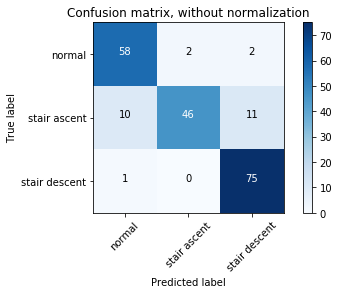

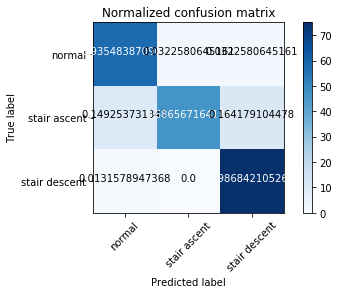

In [11]:
from sklearn.metrics import confusion_matrix
import itertools

#%matplotlib inline
class_names = np.array(['normal', 'stair ascent', 'stair descent'])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [12]:
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
TPa = float(cm[0][0])
Eab = float(cm[0][1])
Eac = float(cm[0][2])
#####################
Eba = float(cm[1][0])
TPb = float(cm[1][1])
Ebc = float(cm[1][2])
#####################
Eca = float(cm[2][0])
Ecb = float(cm[2][1])
TPc = float(cm[2][2])

Pa = TPa/(TPa+Eba+Eca)
Pb = TPb/(TPb+Eab+Ecb)
Pc = TPc/(TPc+Eac+Ebc)

Ra = TPa/(TPa+Eab+Eab)
Rb = TPb/(TPb+Eba+Ebc)
Rc = TPc/(TPc+Eca+Ecb)

TNa = TPb+Ebc+Ecb+TPc
TNb = TPa+Eac+Eca+TPc
TNc = TPa+Eab+Eba+TPb

Sa = TNa/(TNa+Eba+Eca)
Sb = TNb/(TNb+Eab+Eac)
Sc = TNc/(TNc+Eac+Ebc)

Acc = (TPa+TPb+TPc)/(TPa+Eab+Eac+Eba+TPb+Ebc+Eca+Ecb+TPc)

print 'PERFORMANCE MEASURES BY CONFUSION MATRIX'
print ('Accuracy: %.2f %%' % (Acc*100))
print ''
print ('Sensitivity-A: %.2f %%' % (Ra*100))
print ('Sensitivity-B: %.2f %%' % (Rb*100))
print ('Sensitivity-C: %.2f %%' % (Rc*100))
print ''
print ('Precision-A: %.2f %%' % (Pa*100))
print ('Precision-B: %.2f %%' % (Pb*100))
print ('Precision-C: %.2f %%' % (Pc*100))
print ''
print ('Specificity-A: %.2f %%' % (Sa*100))
print ('Specificity-B: %.2f %%' % (Sb*100))
print ('Specificity-C: %.2f %%' % (Sc*100))


PERFORMANCE MEASURES BY CONFUSION MATRIX
Accuracy: 86.96 %

Sensitivity-A: 93.55 %
Sensitivity-B: 68.66 %
Sensitivity-C: 98.68 %

Precision-A: 85.21 %
Precision-B: 95.51 %
Precision-C: 83.40 %

Specificity-A: 91.88 %
Specificity-B: 96.83 %
Specificity-C: 90.18 %


# Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

print 'Training time'
%time rfc = rfc.fit(X_train_std, y_train)

print''

print 'Predict time'
%time y_pred = rfc.predict(X_test_std)

print''

from sklearn.metrics import accuracy_score
print ('ClassifyRF accuracy:---------->%.2f %%' % (accuracy_score(y_test, y_pred)*100))

Training time
CPU times: user 1min 49s, sys: 208 ms, total: 1min 49s
Wall time: 1min 49s

Predict time
CPU times: user 3.77 s, sys: 192 ms, total: 3.96 s
Wall time: 3.96 s

ClassifyRF accuracy:---------->93.06 %


# Confusion Matrix for Random Forest Classifier

Confusion matrix, without normalization
[[4386  159  120]
 [ 134 3390   81]
 [  25   66 3758]]
Normalized confusion matrix
[[ 0.94  0.03  0.03]
 [ 0.04  0.94  0.02]
 [ 0.01  0.02  0.98]]


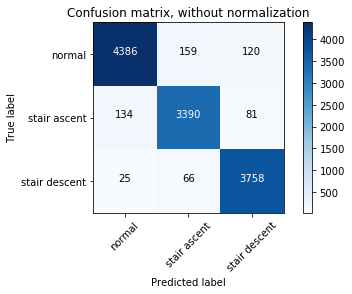

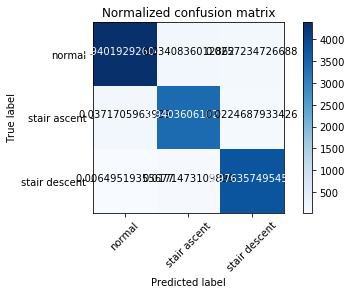

In [15]:
from sklearn.metrics import confusion_matrix
import itertools

%matplotlib inline
class_names = np.array(['normal', 'stair ascent', 'stair descent'])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [15]:
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
TPa = float(cm[0][0])
Eab = float(cm[0][1])
Eac = float(cm[0][2])
#####################
Eba = float(cm[1][0])
TPb = float(cm[1][1])
Ebc = float(cm[1][2])
#####################
Eca = float(cm[2][0])
Ecb = float(cm[2][1])
TPc = float(cm[2][2])

Pa = TPa/(TPa+Eba+Eca)
Pb = TPb/(TPb+Eab+Ecb)
Pc = TPc/(TPc+Eac+Ebc)

Ra = TPa/(TPa+Eab+Eab)
Rb = TPb/(TPb+Eba+Ebc)
Rc = TPc/(TPc+Eca+Ecb)

TNa = TPb+Ebc+Ecb+TPc
TNb = TPa+Eac+Eca+TPc
TNc = TPa+Eab+Eba+TPb

Sa = TNa/(TNa+Eba+Eca)
Sb = TNb/(TNb+Eab+Eac)
Sc = TNc/(TNc+Eac+Ebc)

Acc = (TPa+TPb+TPc)/(TPa+Eab+Eac+Eba+TPb+Ebc+Eca+Ecb+TPc)

print 'PERFORMANCE MEASURES BY CONFUSION MATRIX'
print ('Accuracy: %.2f %%' % (Acc*100))
print ''
print ('Sensitivity-A: %.2f %%' % (Ra*100))
print ('Sensitivity-B: %.2f %%' % (Rb*100))
print ('Sensitivity-C: %.2f %%' % (Rc*100))
print ''
print ('Precision-A: %.2f %%' % (Pa*100))
print ('Precision-B: %.2f %%' % (Pb*100))
print ('Precision-C: %.2f %%' % (Pc*100))
print ''
print ('Specificity-A: %.2f %%' % (Sa*100))
print ('Specificity-B: %.2f %%' % (Sb*100))
print ('Specificity-C: %.2f %%' % (Sc*100))


PERFORMANCE MEASURES BY CONFUSION MATRIX
Accuracy: 99.00 %

Sensitivity-A: 100.00 %
Sensitivity-B: 97.01 %
Sensitivity-C: 100.00 %

Precision-A: 97.10 %
Precision-B: 100.00 %
Precision-C: 100.00 %

Specificity-A: 98.51 %
Specificity-B: 100.00 %
Specificity-C: 100.00 %


# Decision Tree Classifier

In [29]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(min_samples_split = 20)
dtc = dtc.fit(X_train_std, y_train)

print''

print 'Predict time'
%time y_pred = dtc.predict(X_test_std)

print''

from sklearn.metrics import accuracy_score
print ('ClassifyDT accuracy:---------->%.2f %%' % (accuracy_score(y_test, y_pred)*100))


Predict time
CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 18.8 ms

ClassifyDT accuracy:---------->86.90 %


# Confusion Matrix for Decision Tree Classifier

Confusion matrix, without normalization
[[61  1  0]
 [ 0 62  5]
 [ 1  3 72]]
Normalized confusion matrix
[[ 0.98  0.02  0.  ]
 [ 0.    0.93  0.07]
 [ 0.01  0.04  0.95]]


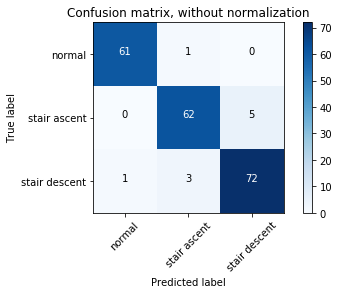

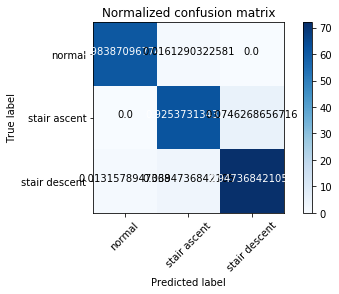

In [17]:
from sklearn.metrics import confusion_matrix
import itertools

#%matplotlib inline
class_names = np.array(['normal', 'stair ascent', 'stair descent'])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [18]:
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
TPa = float(cm[0][0])
Eab = float(cm[0][1])
Eac = float(cm[0][2])
#####################
Eba = float(cm[1][0])
TPb = float(cm[1][1])
Ebc = float(cm[1][2])
#####################
Eca = float(cm[2][0])
Ecb = float(cm[2][1])
TPc = float(cm[2][2])

Pa = TPa/(TPa+Eba+Eca)
Pb = TPb/(TPb+Eab+Ecb)
Pc = TPc/(TPc+Eac+Ebc)

Ra = TPa/(TPa+Eab+Eab)
Rb = TPb/(TPb+Eba+Ebc)
Rc = TPc/(TPc+Eca+Ecb)

TNa = TPb+Ebc+Ecb+TPc
TNb = TPa+Eac+Eca+TPc
TNc = TPa+Eab+Eba+TPb

Sa = TNa/(TNa+Eba+Eca)
Sb = TNb/(TNb+Eab+Eac)
Sc = TNc/(TNc+Eac+Ebc)

Acc = (TPa+TPb+TPc)/(TPa+Eab+Eac+Eba+TPb+Ebc+Eca+Ecb+TPc)

print 'PERFORMANCE MEASURES BY CONFUSION MATRIX'
print ('Accuracy: %.2f %%' % (Acc*100))
print ''
print ('Sensitivity-A: %.2f %%' % (Ra*100))
print ('Sensitivity-B: %.2f %%' % (Rb*100))
print ('Sensitivity-C: %.2f %%' % (Rc*100))
print ''
print ('Precision-A: %.2f %%' % (Pa*100))
print ('Precision-B: %.2f %%' % (Pb*100))
print ('Precision-C: %.2f %%' % (Pc*100))
print ''
print ('Specificity-A: %.2f %%' % (Sa*100))
print ('Specificity-B: %.2f %%' % (Sb*100))
print ('Specificity-C: %.2f %%' % (Sc*100))


PERFORMANCE MEASURES BY CONFUSION MATRIX
Accuracy: 95.22 %

Sensitivity-A: 96.83 %
Sensitivity-B: 92.54 %
Sensitivity-C: 94.74 %

Precision-A: 98.68 %
Precision-B: 94.33 %
Precision-C: 92.70 %

Specificity-A: 99.34 %
Specificity-B: 99.18 %
Specificity-C: 96.27 %


# Ada Boost Classifier

In [28]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100, learning_rate = 2.5395)
abc = abc.fit(X_train_std, y_train)
print''

print 'Predict time'
%time y_pred = abc.predict(X_test_std)

print''

from sklearn.metrics import accuracy_score


print ('ClassifyAB accuracy:---------->%.2f %%' % (accuracy_score(y_test, y_pred)*100))


Predict time
CPU times: user 4.04 s, sys: 0 ns, total: 4.04 s
Wall time: 4.04 s

ClassifyAB accuracy:---------->59.42 %


# Confusion Matrix for Ada Boost Classifier

Confusion matrix, without normalization
[[11994  1597  1440]
 [ 1428 22086   726]
 [ 1580   759 24378]]
Normalized confusion matrix
[[ 0.8   0.11  0.1 ]
 [ 0.06  0.91  0.03]
 [ 0.06  0.03  0.91]]


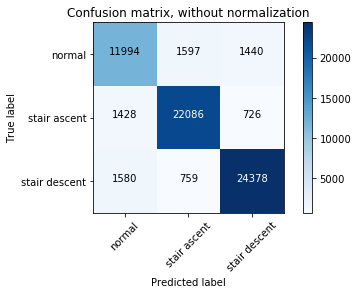

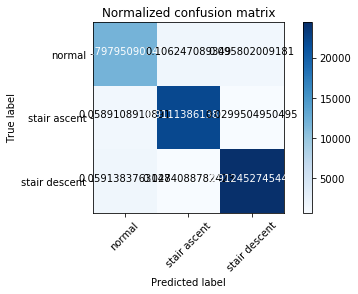

In [27]:
from sklearn.metrics import confusion_matrix
import itertools

#%matplotlib inline
class_names = np.array(['normal', 'stair ascent', 'stair descent'])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [21]:
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
TPa = float(cm[0][0])
Eab = float(cm[0][1])
Eac = float(cm[0][2])
#####################
Eba = float(cm[1][0])
TPb = float(cm[1][1])
Ebc = float(cm[1][2])
#####################
Eca = float(cm[2][0])
Ecb = float(cm[2][1])
TPc = float(cm[2][2])

Pa = TPa/(TPa+Eba+Eca)
Pb = TPb/(TPb+Eab+Ecb)
Pc = TPc/(TPc+Eac+Ebc)

Ra = TPa/(TPa+Eab+Eab)
Rb = TPb/(TPb+Eba+Ebc)
Rc = TPc/(TPc+Eca+Ecb)

TNa = TPb+Ebc+Ecb+TPc
TNb = TPa+Eac+Eca+TPc
TNc = TPa+Eab+Eba+TPb

Sa = TNa/(TNa+Eba+Eca)
Sb = TNb/(TNb+Eab+Eac)
Sc = TNc/(TNc+Eac+Ebc)

Acc = (TPa+TPb+TPc)/(TPa+Eab+Eac+Eba+TPb+Ebc+Eca+Ecb+TPc)

print 'PERFORMANCE MEASURES BY CONFUSION MATRIX'
print ('Accuracy: %.2f %%' % (Acc*100))
print ''
print ('Sensitivity-A: %.2f %%' % (Ra*100))
print ('Sensitivity-B: %.2f %%' % (Rb*100))
print ('Sensitivity-C: %.2f %%' % (Rc*100))
print ''
print ('Precision-A: %.2f %%' % (Pa*100))
print ('Precision-B: %.2f %%' % (Pb*100))
print ('Precision-C: %.2f %%' % (Pc*100))
print ''
print ('Specificity-A: %.2f %%' % (Sa*100))
print ('Specificity-B: %.2f %%' % (Sb*100))
print ('Specificity-C: %.2f %%' % (Sc*100))


PERFORMANCE MEASURES BY CONFUSION MATRIX
Accuracy: 85.43 %

Sensitivity-A: 84.38 %
Sensitivity-B: 73.13 %
Sensitivity-C: 96.05 %

Precision-A: 89.29 %
Precision-B: 85.89 %
Precision-C: 81.88 %

Specificity-A: 94.78 %
Specificity-B: 93.58 %
Specificity-C: 89.37 %


# KNeighbors Classifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=2, weights = 'distance', algorithm = 'auto', p = 1)
knc = knc.fit(X_train_std, y_train)
print''

print 'Predict time'
%time y_pred = knc.predict(X_test_std)

print''

from sklearn.metrics import accuracy_score



print ('ClassifyKN accuracy:---------->%.2f %%' % (accuracy_score(y_test, y_pred)*100))



Predict time
CPU times: user 5.04 s, sys: 0 ns, total: 5.04 s
Wall time: 5.05 s

ClassifyKN accuracy:---------->88.59 %


# Confusion Matrix for KNeighbors Classifier

Confusion matrix, without normalization
[[61  1  0]
 [ 0 67  0]
 [ 0  1 75]]
Normalized confusion matrix
[[ 0.98  0.02  0.  ]
 [ 0.    1.    0.  ]
 [ 0.    0.01  0.99]]


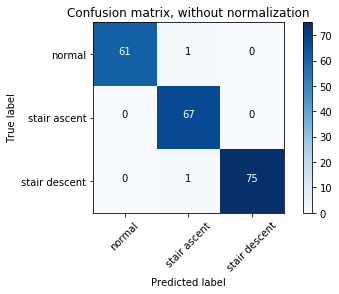

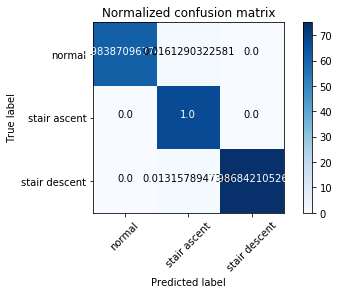

In [23]:
from sklearn.metrics import confusion_matrix
import itertools

#%matplotlib inline
class_names = np.array(['normal', 'stair ascent', 'stair descent'])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [24]:
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
TPa = float(cm[0][0])
Eab = float(cm[0][1])
Eac = float(cm[0][2])
#####################
Eba = float(cm[1][0])
TPb = float(cm[1][1])
Ebc = float(cm[1][2])
#####################
Eca = float(cm[2][0])
Ecb = float(cm[2][1])
TPc = float(cm[2][2])

Pa = TPa/(TPa+Eba+Eca)
Pb = TPb/(TPb+Eab+Ecb)
Pc = TPc/(TPc+Eac+Ebc)

Ra = TPa/(TPa+Eab+Eab)
Rb = TPb/(TPb+Eba+Ebc)
Rc = TPc/(TPc+Eca+Ecb)

TNa = TPb+Ebc+Ecb+TPc
TNb = TPa+Eac+Eca+TPc
TNc = TPa+Eab+Eba+TPb

Sa = TNa/(TNa+Eba+Eca)
Sb = TNb/(TNb+Eab+Eac)
Sc = TNc/(TNc+Eac+Ebc)

Acc = (TPa+TPb+TPc)/(TPa+Eab+Eac+Eba+TPb+Ebc+Eca+Ecb+TPc)

print 'PERFORMANCE MEASURES BY CONFUSION MATRIX'
print ('Accuracy: %.2f %%' % (Acc*100))
print ''
print ('Sensitivity-A: %.2f %%' % (Ra*100))
print ('Sensitivity-B: %.2f %%' % (Rb*100))
print ('Sensitivity-C: %.2f %%' % (Rc*100))
print ''
print ('Precision-A: %.2f %%' % (Pa*100))
print ('Precision-B: %.2f %%' % (Pb*100))
print ('Precision-C: %.2f %%' % (Pc*100))
print ''
print ('Specificity-A: %.2f %%' % (Sa*100))
print ('Specificity-B: %.2f %%' % (Sb*100))
print ('Specificity-C: %.2f %%' % (Sc*100))


PERFORMANCE MEASURES BY CONFUSION MATRIX
Accuracy: 99.02 %

Sensitivity-A: 96.83 %
Sensitivity-B: 100.00 %
Sensitivity-C: 98.68 %

Precision-A: 100.00 %
Precision-B: 97.15 %
Precision-C: 100.00 %

Specificity-A: 100.00 %
Specificity-B: 99.19 %
Specificity-C: 100.00 %


# Classificadores Utilizados:

### knc : KNeighborsClassifier; 
### abc : AdaBoostClassifier; 
### dtc : tree.DecisionTreeClassifier; 
### rfc : RandomForestClassifier; 
### gnb : GaussianNB; 
### rbf_svc : SVMClassifierRBF; 
### poly_svc = SVMClassifierPoly

In [25]:
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[('knc', knc), ('abc', abc), ('dtc', dtc), ('rfc', rfc), ('gnb', gnb), 
                                     ("rbf_svc", rbf_svc), ('poly_svc', poly_svc)], voting='hard',weights=[3,1,1,7,1,4,3])
eclf1 = eclf1.fit(X_train_std, y_train)

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

for clf, label in zip([knc, abc, dtc, rfc, gnb, rbf_svc, poly_svc, eclf1], ['KNieghbors', 'Ada Boost', 'Decision Tree', 
                                                                           'Random Forest', 'Naive Bayes', 'SVM-RBF', 
                                                                           'SVM-Poly', 'Ensemble']):
    scores = (cross_val_score(clf, X_train_std, y_train, cv=5, scoring='accuracy'))*100
    #print("Accuracy: %0.2f %%(+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    print("Accuracy: %0.2f %% [%s]" % (scores.mean(), label))

Accuracy: 96.73 % [KNieghbors]
Accuracy: 77.89 % [Ada Boost]
Accuracy: 92.15 % [Decision Tree]
Accuracy: 99.18 % [Random Forest]
Accuracy: 79.09 % [Naive Bayes]
Accuracy: 96.89 % [SVM-RBF]
Accuracy: 95.92 % [SVM-Poly]
Accuracy: 99.67 % [Ensemble]


In [27]:


import sklearn

print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.18.1.


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
from sklearn import cross_validation

pca = PCA(n_components=10)# adjust yourself
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)

clf = rfc
clf.fit(X_t_train, y_train)
print 'score', clf.score(X_t_test, y_test)

clf.predict(X_t_test)

scores = (cross_val_score(clf, X_train_std, y_train, cv=5, scoring='accuracy'))*100
print("Accuracy: %0.2f %%" % (scores.mean()))

BAK
import math
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
TP = float(cm[0][0])
FP = float(cm[1][0])
FN = float(cm[0][1])
TN = float(cm[1][1])

print 'PERFORMANCE MEASURES BY CONFUSION MATRIX'
print ('Sensitivity: %.2f %%' % (((TP)/(TP+FN))*100))
print ('Specificity: %.2f %%' % ((TN)/((FP+TN))*100))
print ('Accuracy: %.2f %%' % ((TP+TN)/((TP+FN)+(FP+TN))*100))
print ('phi: %.2f ' % ((TP*TN-FP*FN)/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))))
